In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/Merged_dataset_normaldata.xlsx")

In [ ]:
df_statistics = df.groupby(["GEOGRAPHY", "AGE"])["total_amount_sales"].agg(["mean","min","max","count","median"])
df_statistics

mean   min       max  count  median
GEOGRAPHY AGE                                          
France    39   16.265668  0.24    919.52   1585    7.23
          40   21.516691  0.02   6548.00   4387    8.00
          41   20.674661  0.02   1492.58   3484    7.50
          42   18.498590  0.02   1741.68   3595    8.19
          43   20.867895  0.15   3000.00   2358    7.43
...                  ...   ...       ...    ...     ...
UK        43   22.008063  0.48   1061.61   1130    8.42
          44   27.665801  0.02   3201.80   4115    7.43
          45   20.053645  0.02   1494.06   3272    7.96
          46   26.308960  0.02  13164.80   3192    8.18
          47   19.172206  0.18   1336.30   1731    7.88

[64 rows x 5 columns]

In [ ]:
grouped_data = df.groupby(["GEOGRAPHY", "AGE", "SKU_Category"])["total_amount_sales"].sum().reset_index()

sorted_data = grouped_data.sort_values(by=["GEOGRAPHY", "AGE", "total_amount_sales"], ascending=[True, True, False])

top_3_skus_by_age = sorted_data.groupby(["GEOGRAPHY", "AGE"]).head(3)

print(top_3_skus_by_age)

     GEOGRAPHY  AGE SKU_Category  total_amount_sales
108     France   39          SJS             2253.02
73      France   39          LPF             1240.58
66      France   39          JI5             1103.78
158     France   40          6BZ             8101.37
197     France   40          H8O             7563.84
...        ...  ...          ...                 ...
7490        UK   46          6BZ             8403.13
7543        UK   46          JI5             8194.79
7628        UK   47          6BZ             4532.07
7634        UK   47          9ZX             2764.31
7681        UK   47          LPF             1754.11

[192 rows x 4 columns]


<ipython-input-38-2b05c92137cf>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(best_selling_skus_by_age['AGE'].unique()))


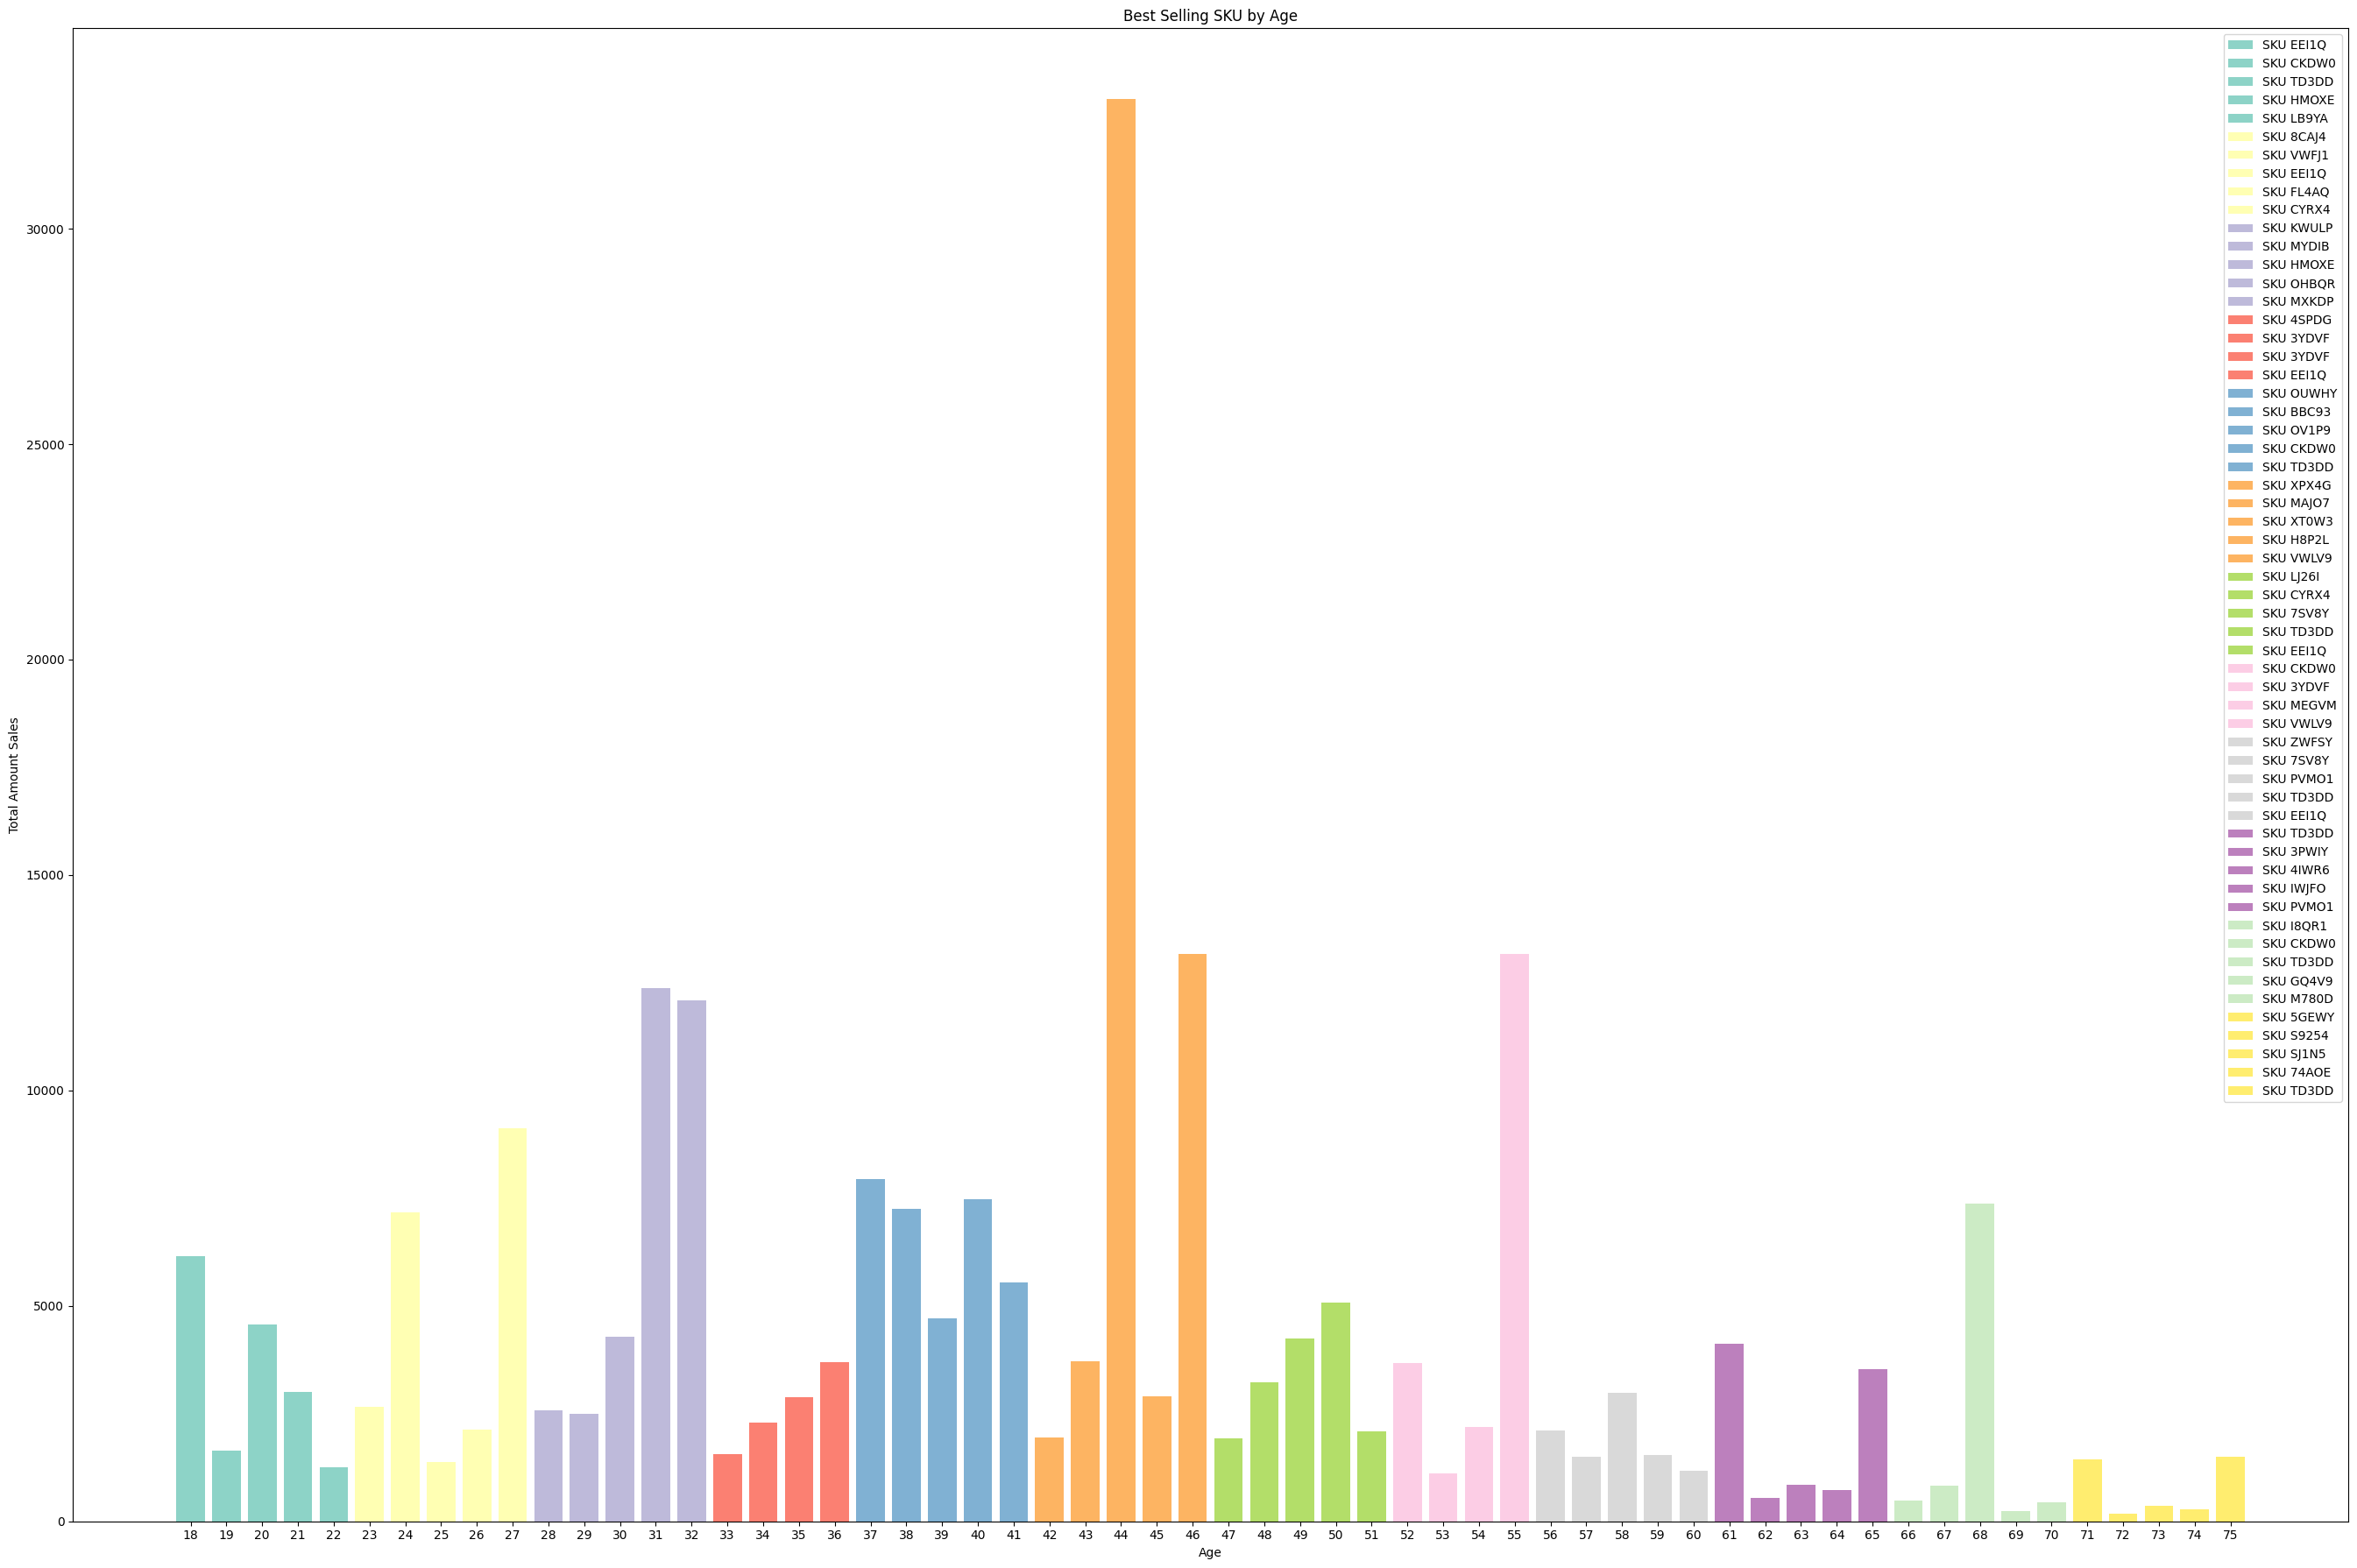

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data = df.groupby(["GEOGRAPHY", "AGE", "SKU"])["total_amount_sales"].sum().reset_index()

idx = grouped_data.groupby("AGE")["total_amount_sales"].idxmax()

best_selling_skus_by_age = grouped_data.loc[idx]

colormap = plt.cm.get_cmap('Set3', len(best_selling_skus_by_age['AGE'].unique()))

ages = best_selling_skus_by_age['AGE'].unique()

plt.figure(figsize=(27, 18))
for i, age_group in enumerate(ages):
    age_group_data = best_selling_skus_by_age[best_selling_skus_by_age["AGE"] == age_group]
    plt.bar(np.full(len(age_group_data), i), age_group_data["total_amount_sales"], color=colormap(i), label=f"SKU {age_group_data['SKU'].values[0]}")

plt.xlabel("Age")
plt.ylabel("Total Amount Sales")
plt.title("Best Selling SKU by Age")
plt.xticks(ticks=np.arange(len(ages)), labels=ages)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-40-4859dbb42356>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(best_selling_skucat_by_age['AGE'].unique()))


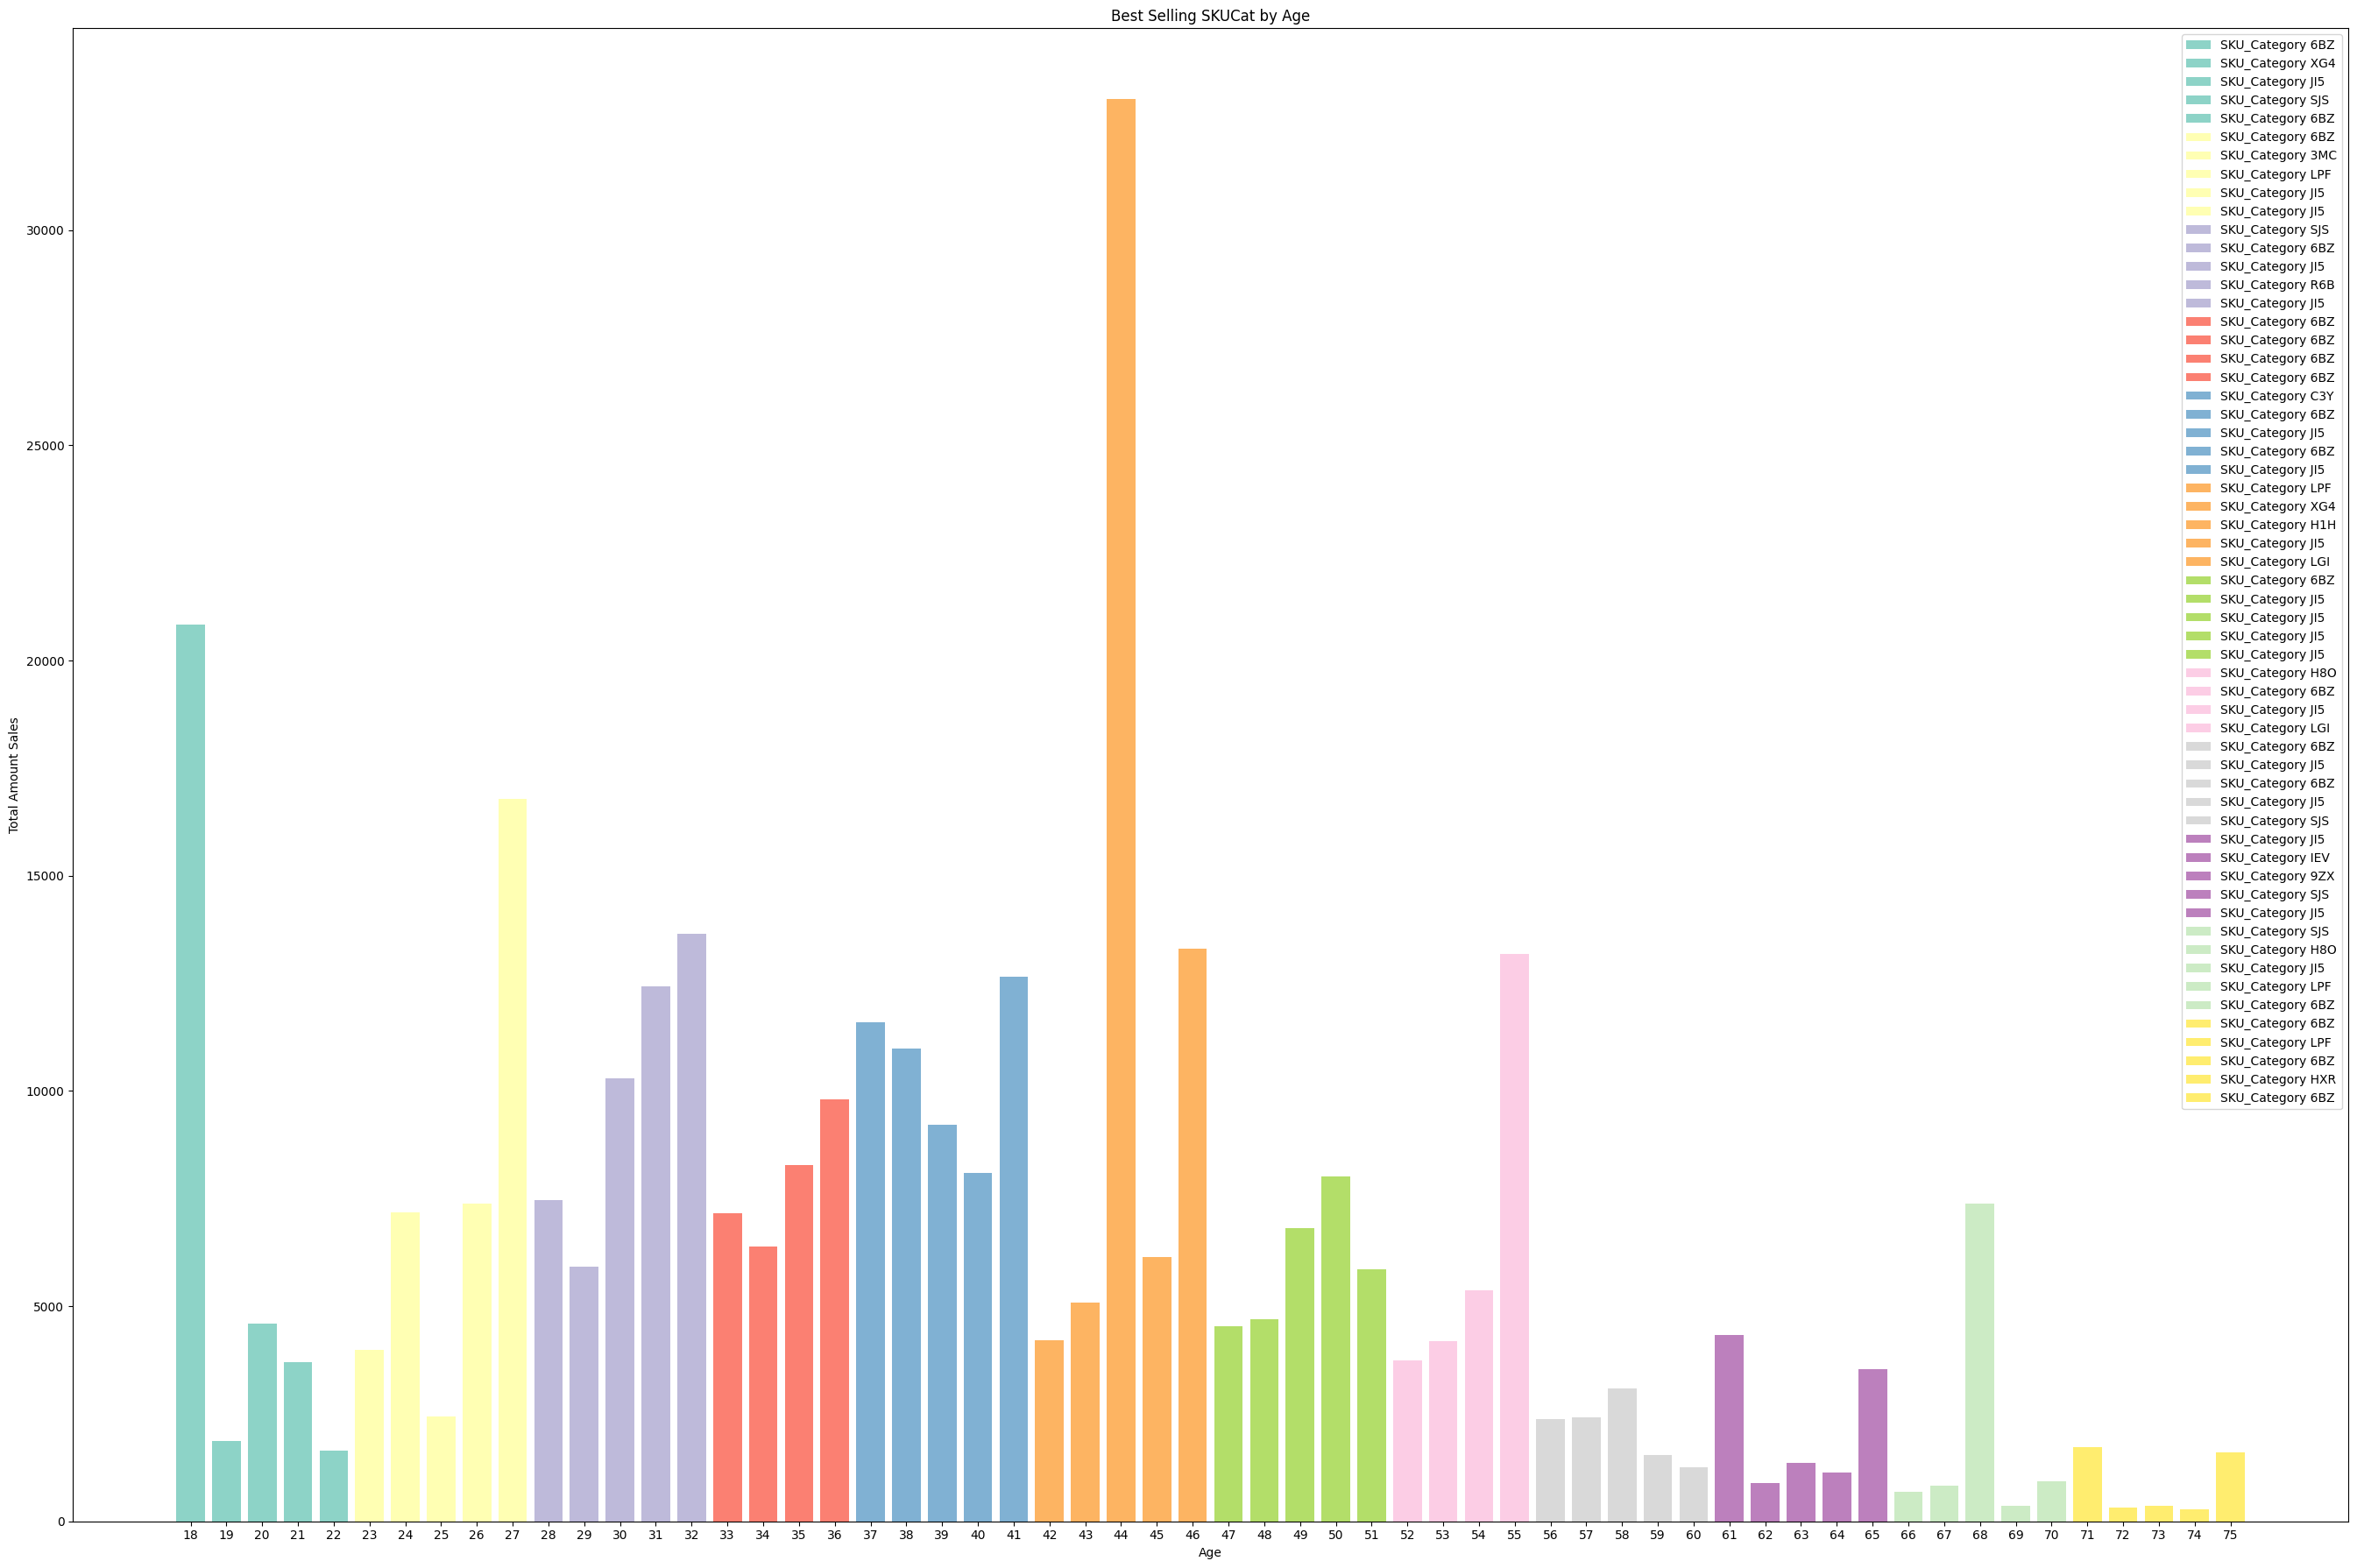

In [ ]:
grouped_data = df.groupby(["GEOGRAPHY", "AGE", "SKU_Category"])["total_amount_sales"].sum().reset_index()

idx = grouped_data.groupby("AGE")["total_amount_sales"].idxmax()

best_selling_skucat_by_age = grouped_data.loc[idx]

colormap = plt.cm.get_cmap('Set3', len(best_selling_skucat_by_age['AGE'].unique()))

ages = best_selling_skucat_by_age['AGE'].unique()

plt.figure(figsize=(27, 18))
for i, age_group in enumerate(ages):
    age_group_data = best_selling_skucat_by_age[best_selling_skucat_by_age["AGE"] == age_group]
    plt.bar(np.full(len(age_group_data), i), age_group_data["total_amount_sales"], color=colormap(i), label=f"SKU_Category {age_group_data['SKU_Category'].values[0]}")

plt.xlabel("Age")
plt.ylabel("Total Amount Sales")
plt.title("Best Selling SKUCat by Age")
plt.xticks(ticks=np.arange(len(ages)), labels=ages)
plt.legend()
plt.tight_layout()
plt.show()


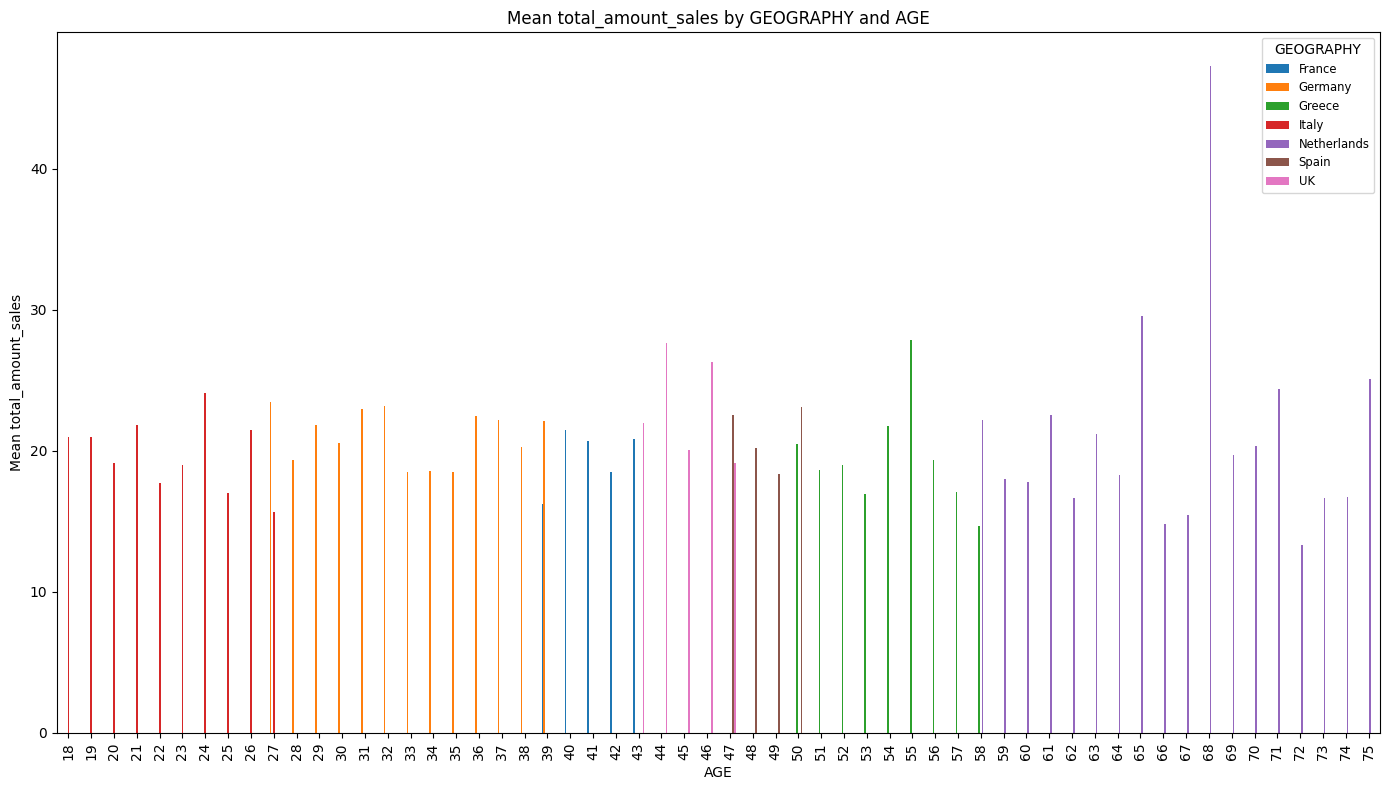

In [ ]:
pivot_table = df_statistics.pivot_table(index="AGE", columns="GEOGRAPHY", values="mean", fill_value=0)
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.xlabel("AGE")
plt.ylabel("Mean total_amount_sales")
plt.title("Mean total_amount_sales by GEOGRAPHY and AGE")
plt.legend(title="GEOGRAPHY", title_fontsize='medium', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The age groups with the highest mean spending differ across countries, indicating varying
consumer behaviors and preferences. The Netherlands has the highest mean
spending in the age group of 68, suggesting a potentially affluent consumer segment. The UK
shows a significant difference in mean spending between age groups 44 and 47, indicating
possible variations in purchasing power or preferences. Greece exhibits relatively high mean
spending in the age group of 55, potentially reflecting unique consumer preferences or market
trends. In Germany, the mean spending across different age groups showcases a relatively
consistent pattern. This suggests a stable economy and a population with relatively uniform
purchasing power. The mean spending tends to be moderate, indicating a balanced
distribution of income and expenditure. This aligns with Germany's reputation for a strong
industrial base, a robust job market, and a high standard of living. The moderate mean
spending across various age groups indicates a healthy consumer ecosystem with consistent
purchasing behaviors. In contrast, Italy's mean spending reveals some variation across
different age groups. The mean spending tends to be comparatively lower, especially in the
younger age groups. This could be attributed to economic factors such as youth unemployment
and the financial challenges faced by younger individuals. Spain's mean spending portrays a
mixed trend. Some age groups exhibit consistent mean spending, while others showcase
fluctuations. Economic factors and generational differences likely contribute to these
variations. In France, the mean spending varies across age groups, indicating diverse
consumer preferences. However, as age increases, mean spending rises, suggesting a trend
of increased financial stability and purchasing power with age.

The observed variations in mean spending across different age groups and countries
emphasize the intricate interplay between demographic factors, economic conditions, and
consumer preferences. The distinct patterns identified within each country indicate the
presence of localized market dynamics and potential cultural influences. Such insights hold
significance for marketers and policymakers seeking to tailor their strategies to cater to the
diverse spending behaviors exhibited by different age groups within specific countries. Delving
into the nuances of consumer behavior and market segmentation, organizations can optimize
their approaches to product development, pricing, and promotional activities, thereby
maximizing their market reach and effectiveness.

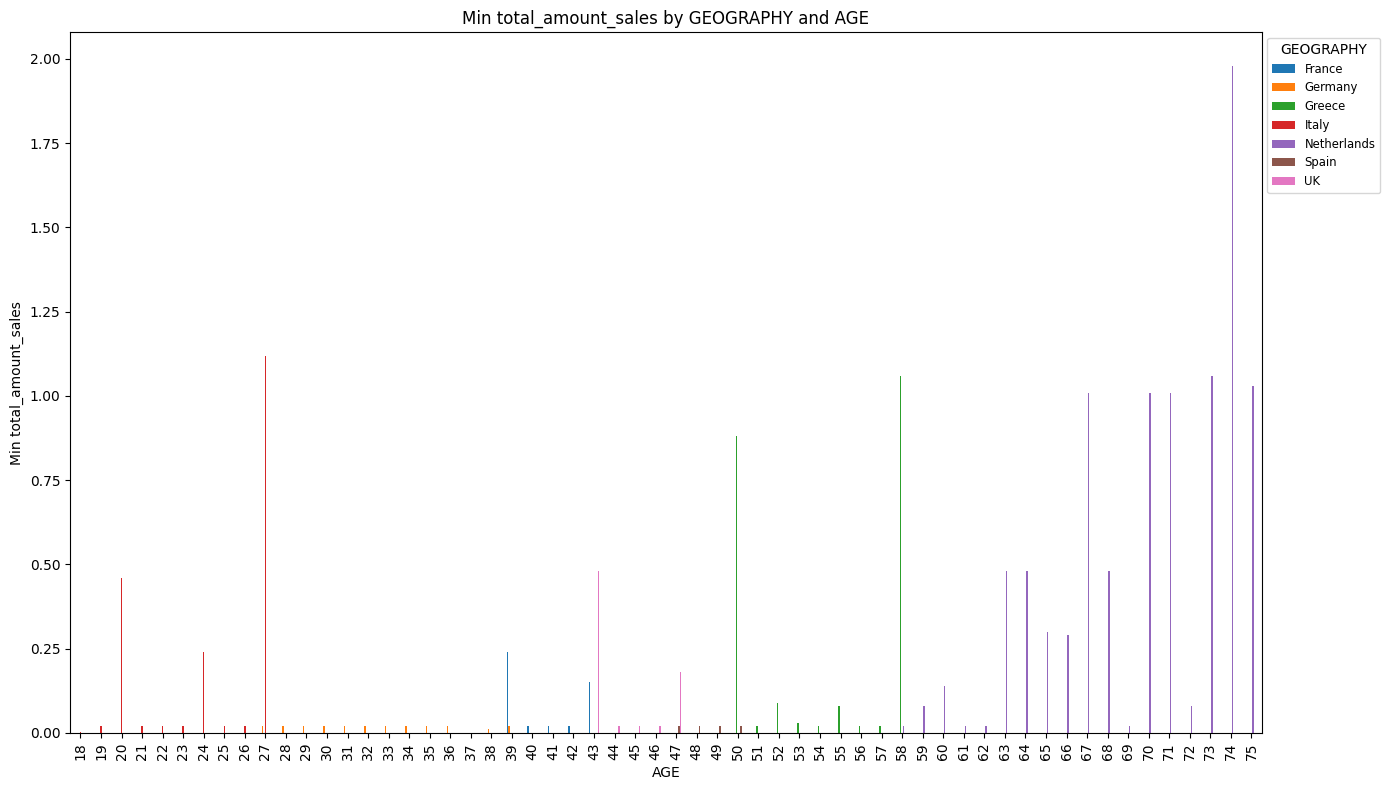

In [ ]:

pivot_table = df_statistics.pivot_table(index="AGE", columns="GEOGRAPHY", values="min", fill_value=0)
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.xlabel("AGE")
plt.ylabel("Min total_amount_sales")
plt.title("Min total_amount_sales by GEOGRAPHY and AGE")
plt.legend(title="GEOGRAPHY", title_fontsize='medium', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

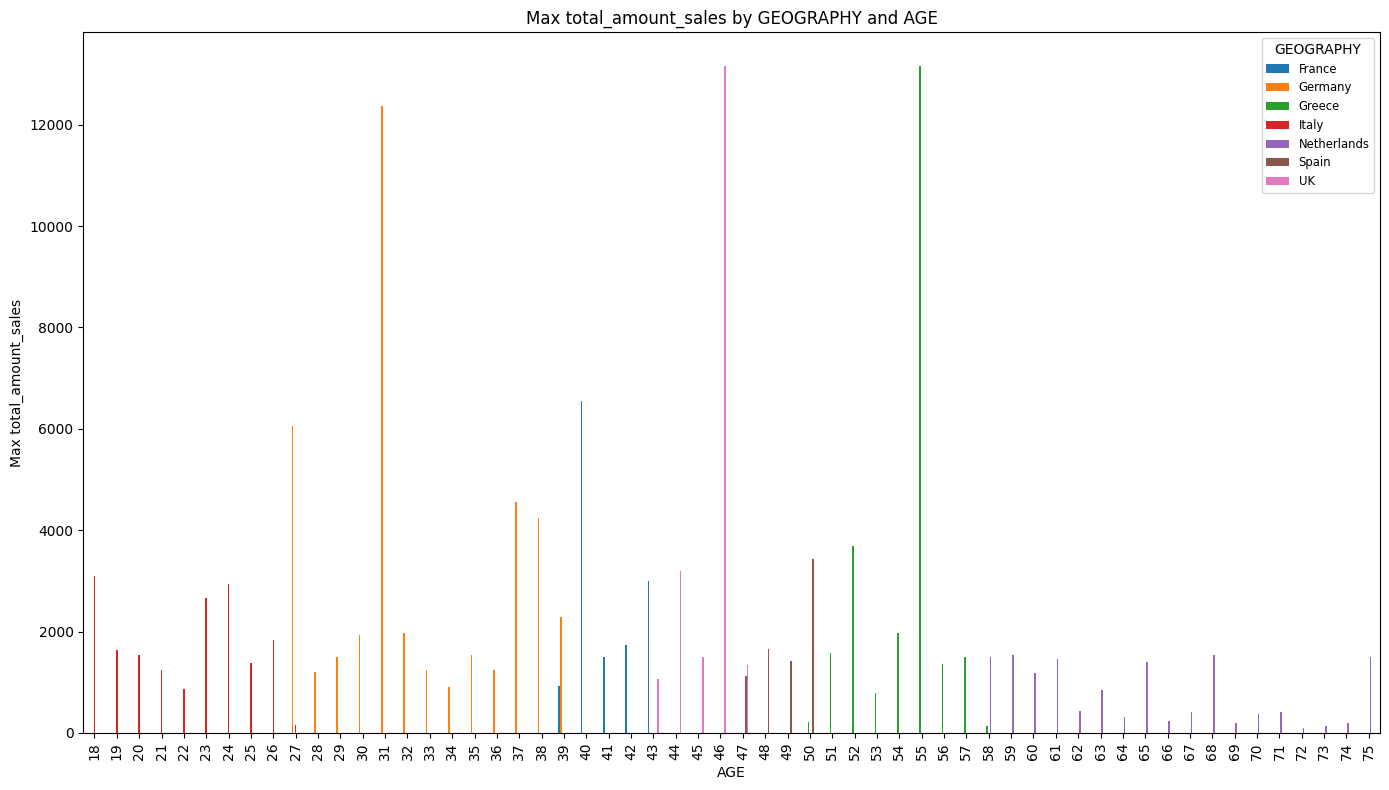

In [ ]:
pivot_table = df_statistics.pivot_table(index="AGE", columns="GEOGRAPHY", values="max", fill_value=0)
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.xlabel("AGE")
plt.ylabel("Max total_amount_sales")
plt.title("Max total_amount_sales by GEOGRAPHY and AGE")
plt.legend(title="GEOGRAPHY", title_fontsize='medium', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The data unveils intriguing variations in minimum and maximum spending across
different age groups. For instance, younger age groups, such as those between 18 and 25,
exhibit lower minimum spending levels, perhaps due to limited disposable income during the
early stages of their careers or education, however, the number of such customers is the
highest among all age ranges. As age advances, both minimum and maximum spending show
an upward trajectory. This can be exemplified by the fact that individuals in the 36-55 age
group tend to have higher financial stability and disposable income, contributing to increased
spending capacity.
Maximum spending examination offers insights into the upper echelons of consumer
purchasing behavior. In countries like Germany and the UK, where maximum spending is
relatively high, businesses can leverage this trend to introduce premium products or services
that cater to affluent consumers. For instance, individuals aged 37-55, who tend to
have higher maximum spending, could be targeted by luxury brands or exclusive experiences.

Different age segments exhibit distinct consumer behaviors, with some groups consistently
showing higher minimum sales than others. Minimum sales could be influenced by economic
factors such as disposable income, unemployment rates, and cost of living. Age groups with
relatively lower minimum sales may be more sensitive to economic fluctuations. For instance,
in countries where younger age groups demonstrate higher minimum sales, there might be a
greater focus on youth-oriented products or services. In Germany, the age group 27-29 exhibits
comparatively lower minimum sales. This could be attributed to the age bracket's
early career stage and potentially limited financial resources. Contrasting with Germany, Italy's
age group 18-19 shows relatively higher minimum sales. This might reflect a higher disposable
income among young adults or a cultural inclination towards certain spending behaviors. The
age group 47-50 in Spain demonstrates notable fluctuations in minimum sales. This could be
due to varying economic conditions and consumer preferences within this range. In the
Netherlands, for instance, consumers aged 70 and above tend to make the highest purchases,
indicating potential economic security among older demographics. This trend may be due to
accumulated savings and retirement benefits that enable larger discretionary spending.

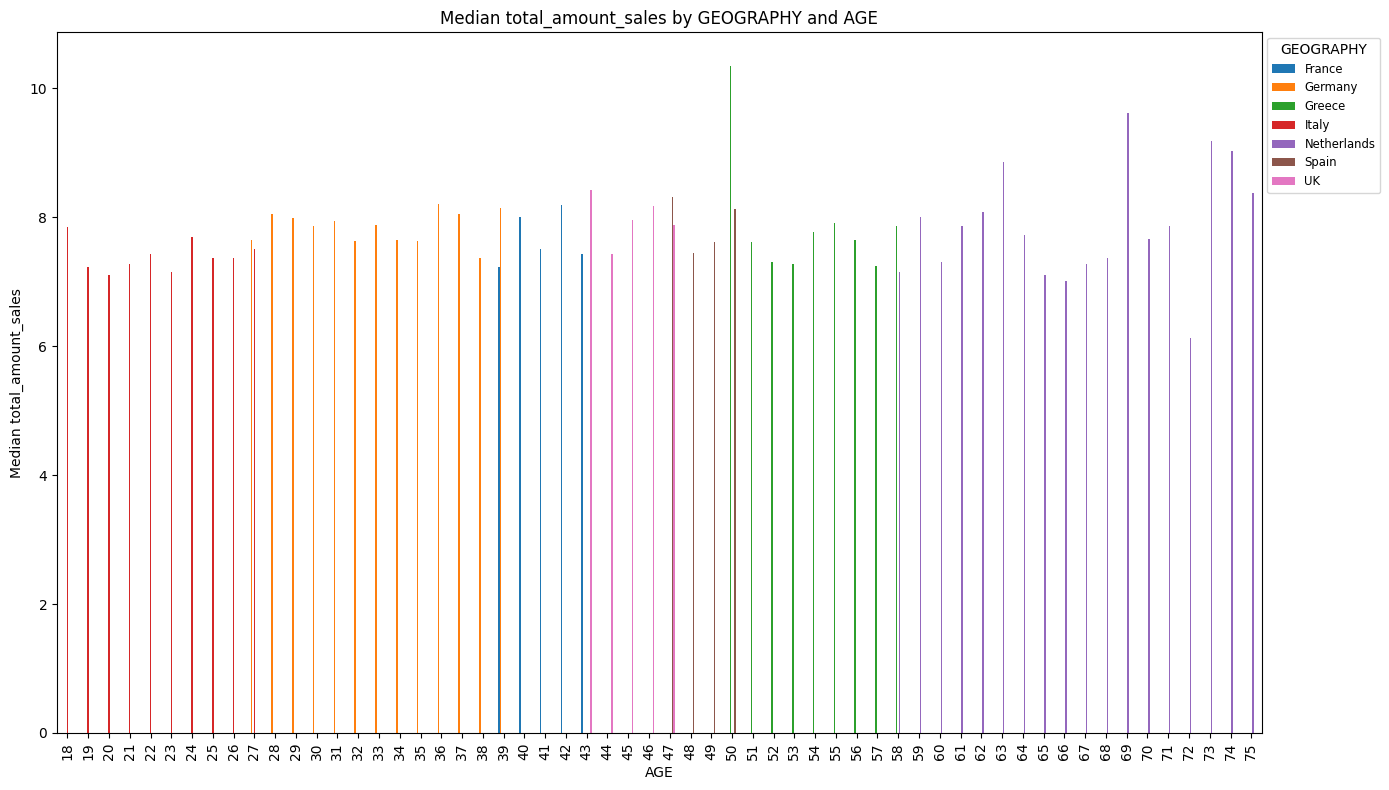

In [ ]:

pivot_table = df_statistics.pivot_table(index="AGE", columns="GEOGRAPHY", values="median", fill_value=0)
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.xlabel("AGE")
plt.ylabel("Median total_amount_sales")
plt.title("Median total_amount_sales by GEOGRAPHY and AGE")
plt.legend(title="GEOGRAPHY", title_fontsize='medium', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Median spending provides insights into the middle point of consumer expenditure within
different age groups and countries. This measure varies across age groups, reflecting diverse
consumer preferences. Younger age groups tend to exhibit lower median spending, possibly
due to limited disposable income. As age increases, median spending rises, indicating
improved financial stability and purchasing power. Germany and the UK show relatively
consistent median spending across age groups. This suggests that economic factors
have less impact on spending behavior, resulting in a stable consumer landscape. Median
spending in Greece gradually increases with age. Younger consumers face economic
challenges, leading to lower median spending. Italy's median spending trend is distinctive.
Younger age groups exhibit relatively lower median spending, influenced by economic
constraints. However, median spending increases with age, reflecting improved financial
standing over time. Spain's and the Netherlands’ median spending portrays a mixed trend.
Some age groups exhibit consistent median spending, while others showcase fluctuations.
Economic factors and generational differences contribute to these variations, including
retirement and a focus on more conservative spending, or conversely accumulated savings
and retirement benefits that enable larger discretionary spending. Median spending in the UK
hesitates across age ranges. Certain age groups exhibit higher median spending, reflecting
differences in income, lifestyle, and economic conditions

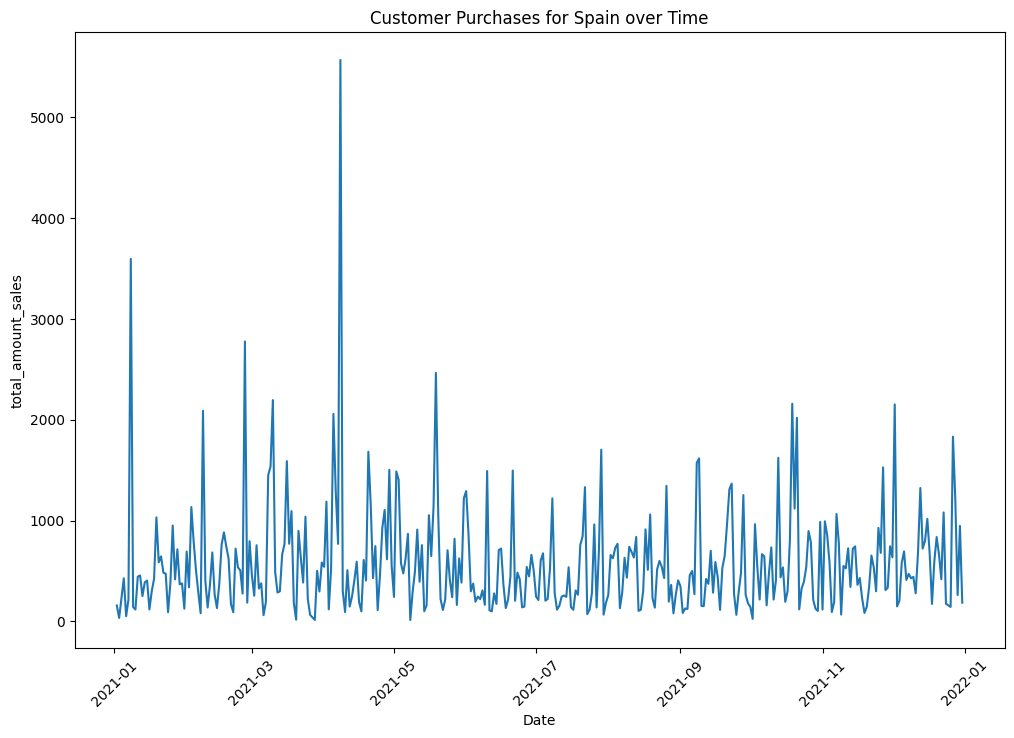

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'Spain']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for Spain over Time')
plt.xticks(rotation=45)

plt.show()

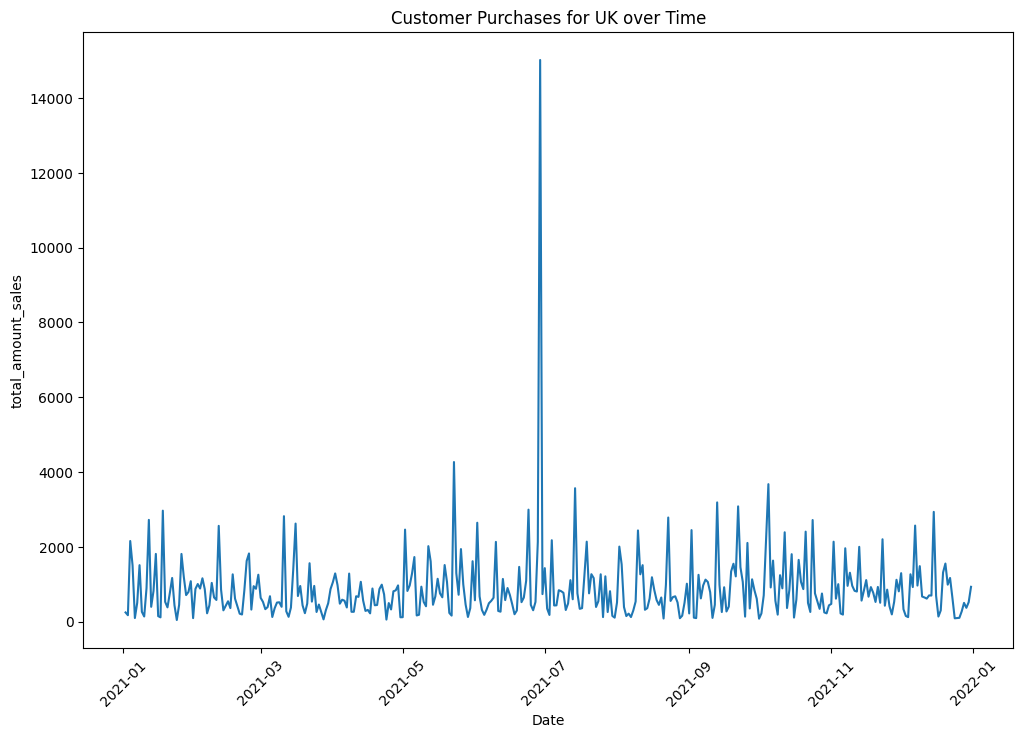

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'UK']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for UK over Time')
plt.xticks(rotation=45)

plt.show()

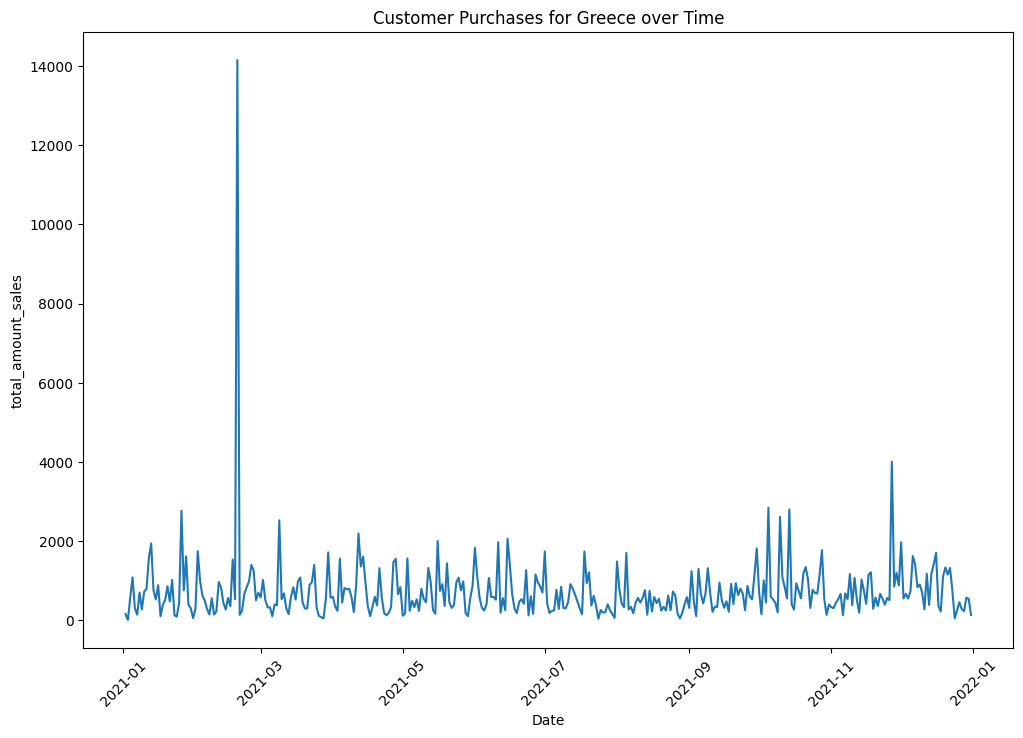

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'Greece']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for Greece over Time')
plt.xticks(rotation=45)

plt.show()

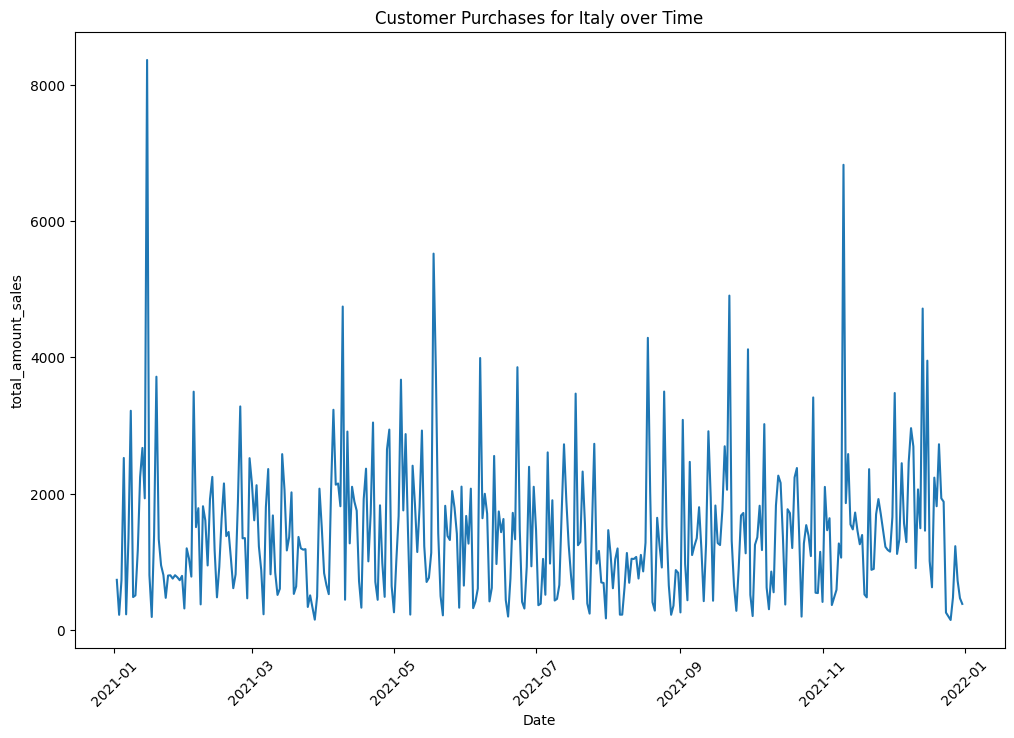

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'Italy']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for Italy over Time')
plt.xticks(rotation=45)

plt.show()

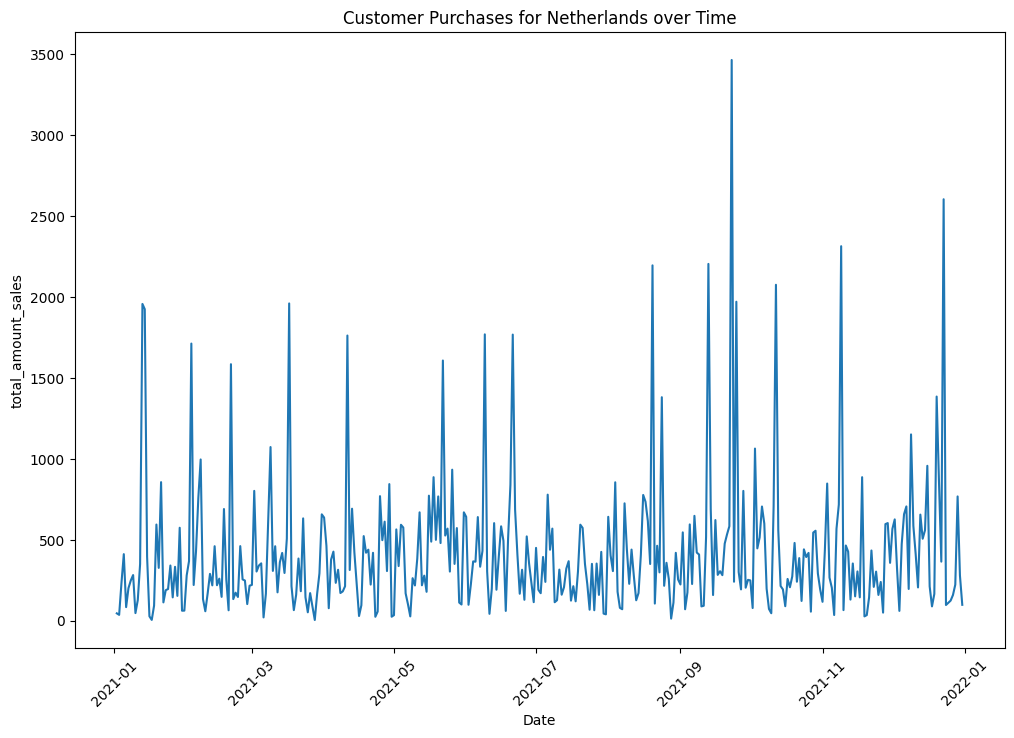

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'Netherlands']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for Netherlands over Time')
plt.xticks(rotation=45)

plt.show()

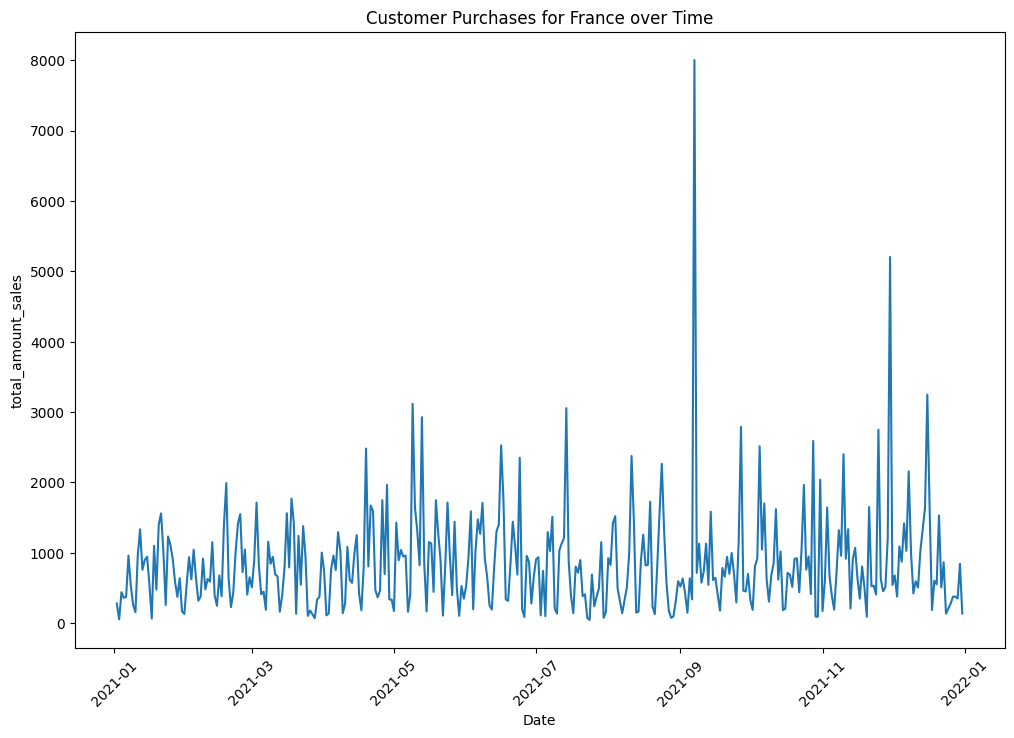

In [ ]:
country_data = df[df['GEOGRAPHY'] == 'France']

grouped_data = country_data.groupby('Date')['total_amount_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(grouped_data['Date'], grouped_data['total_amount_sales'])

plt.xlabel('Date')
plt.ylabel('total_amount_sales')
plt.title(f'Customer Purchases for France over Time')
plt.xticks(rotation=45)

plt.show()

The analysis of line charts depicting customer purchases across various countries provides
insightful observations regarding the recurring purchasing trends over time. In the specific case
of Germany and the Netherlands, the charts illustrate distinctive patterns of heightened
customer purchases during certain periods, which could potentially correspond to holiday
seasons or festive occasions.
In Germany, noticeable peaks in customer purchases are evident during March, June, and
December. These pronounced spikes align with periods that could be associated with
increased consumer activity, potentially related to special events or promotions. Similarly, for
the Netherlands, the line chart showcases elevated customer purchases during February,
June, October, and December. These distinct peaks suggest recurring patterns of heightened
spending during these months.
Although the precise months of these sales peaks vary across countries, a common thread
emerges with notable sales spikes recurring in June, with additional significant peaks observed
in February-March, October, and early December. This shared trend underscores the influence
of seasonal factors on consumer behavior and presents strategic opportunities for businesses
to align their marketing efforts and promotional campaigns to capitalize on these observed
purchasing patterns. By understanding the specific months of heightened customer activity,
businesses can tailor their strategies to effectively target and engage their audience during
these critical periods

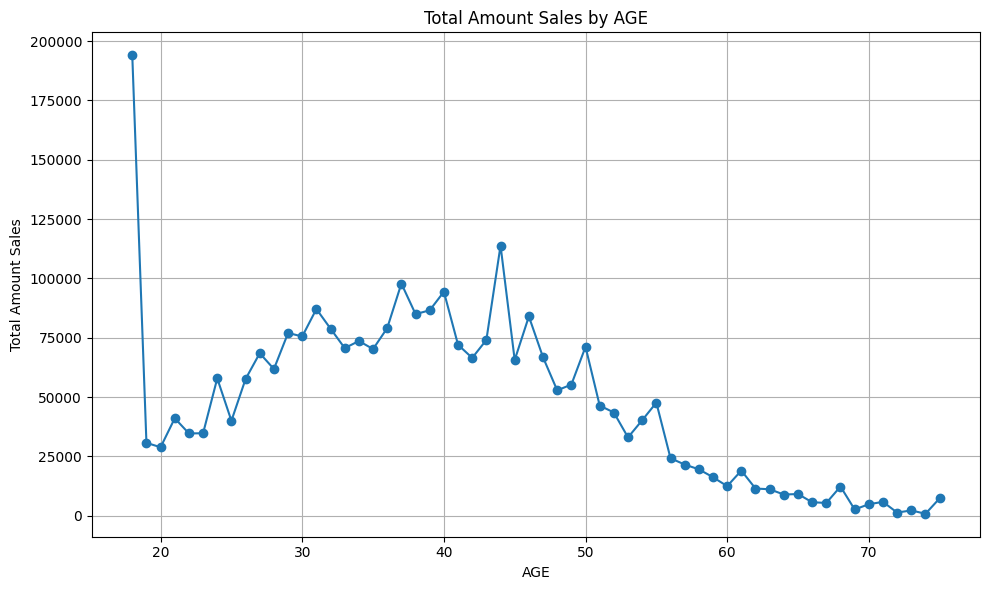

In [ ]:
age_sales = df.groupby("AGE")["total_amount_sales"].sum().reset_index()

age_sales = age_sales.sort_values(by="AGE")

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(age_sales["AGE"], age_sales["total_amount_sales"], marker='o', linestyle='-')
plt.xlabel("AGE")
plt.ylabel("Total Amount Sales")
plt.title("Total Amount Sales by AGE")
plt.grid(True)
plt.tight_layout()
plt.show()

By examining the data, you can observe the sales trends within specific age groups.
For instance, France demonstrates a peak in sales for individuals aged 40, with a substantial
amount of total sales and customer participation, this could be attributed to consumers entering
middle age and having higher disposable income. Similarly, Germany showcases higher sales
among customers in their 30s and early 40s, while Italy displays strong sales contributions
from customers aged 18 to 26 caused by the scaling-up of this age range to propose specific
products for youth, as far as the number of customers in this group is the highest among all.
The data underscores that peak purchasing age groups vary across countries, indicating
potential differences in consumer preferences, economic factors, and cultural influences. For
example, in the Netherlands, there's a notable peak in sales for individuals aged 61, this could
be due to retirement-related spending patterns or other demographic influences, whereas
Spain displays peak sales among customers aged 50, indicating a time when consumers are
more established financially and engage in significant purchasing

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Date', ylabel='total_amount_sales'>

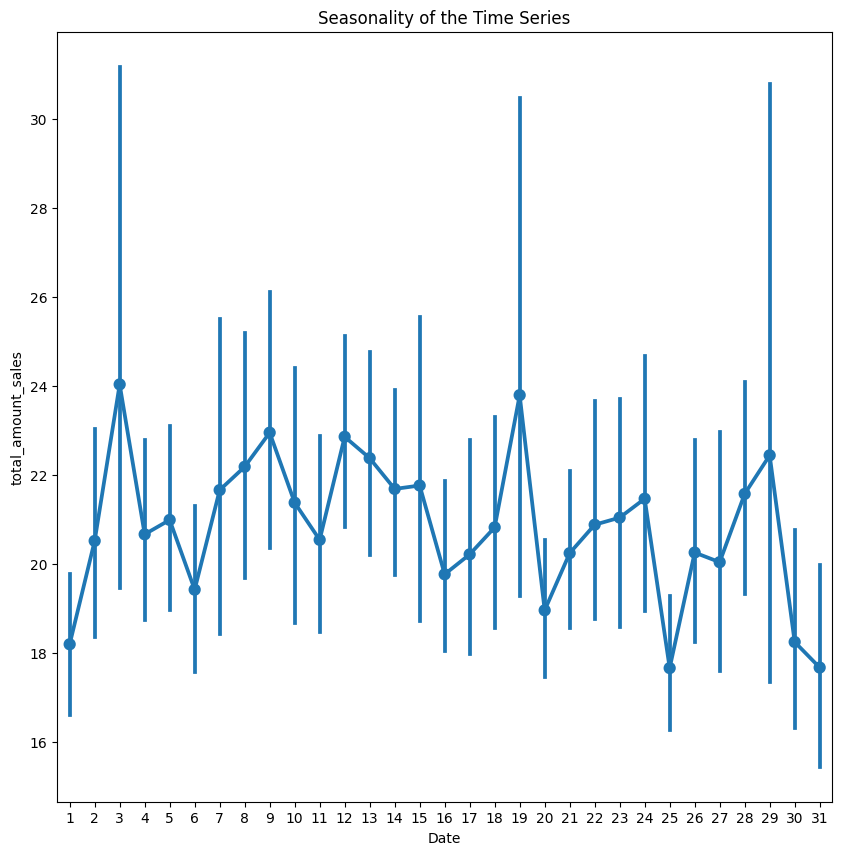

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
df = df.copy()
df['Date'] = pd.DatetimeIndex(df.index).day
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Date',y='total_amount_sales',data=df)

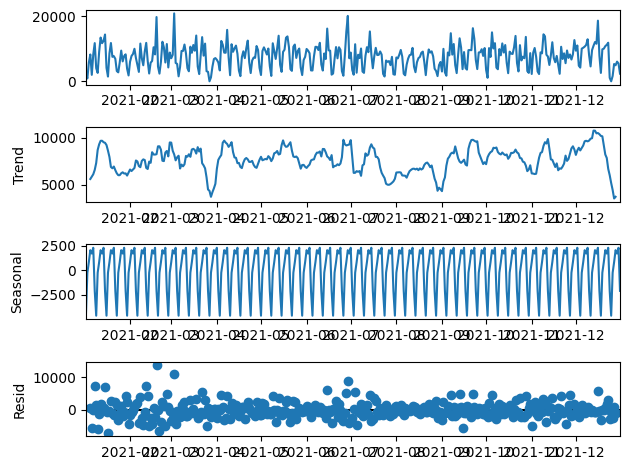

In [ ]:
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

analysis = df[['total_amount_sales']].resample('D').sum()

decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot()
plt.show()


Upon analysis of the seasonal decomposition plot, it has been established that the dataset's
seasonal component is confined within the interval of -2500 to 2500. This finding
signifies that the amplitude of the recurring patterns within the time series remains within this
range. This interpretation is grounded in the assumption that the seasonal component
represents the segment of the data that showcases repetitive behaviors at consistent time
intervals. The interval of [-2500; 2500] serves as an indicator of the seasonal influence's
magnitude on the data. The amplitude stands as a representation of the peak-to-peak variation
generated by the periodic seasonal patterns. The observation that the amplitude aligns with
the range of [-2500, 2500] suggests that the strength of the seasonal patterns is relatively
moderate. While not characterized by drastic fluctuations, the data exhibits perceptible
oscillations that recur over time.

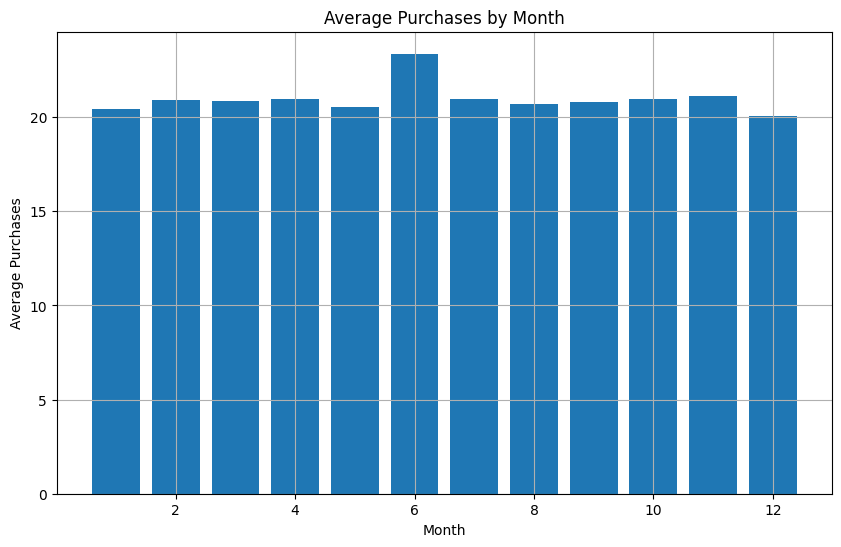

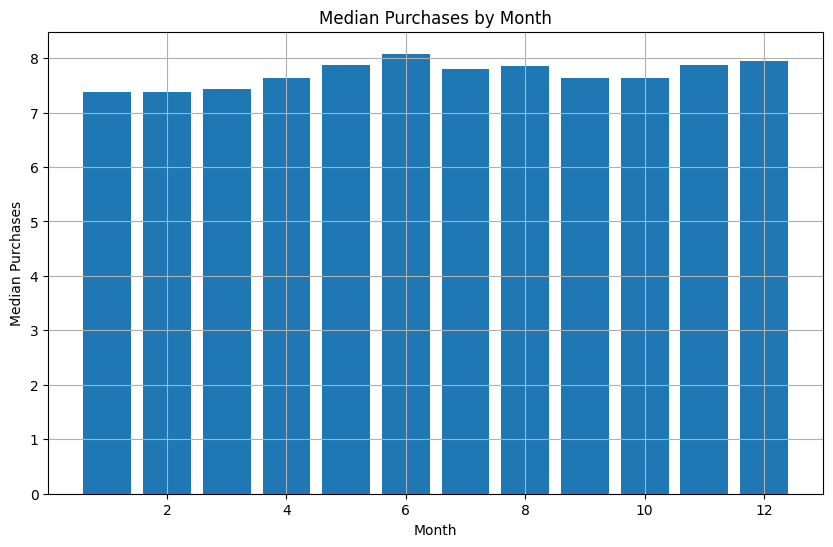

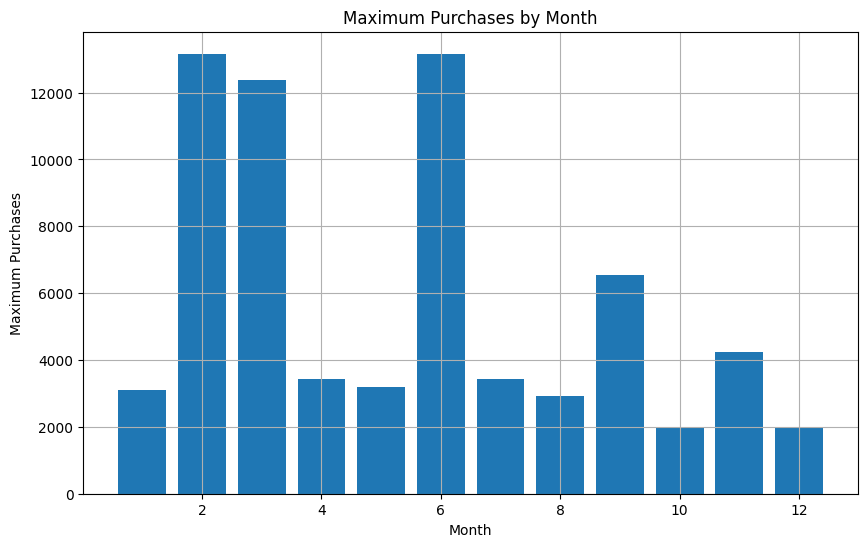

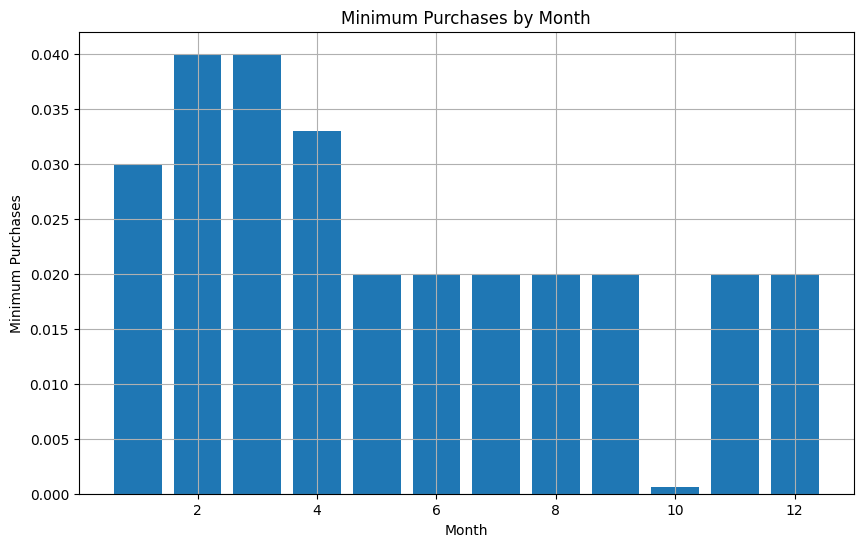

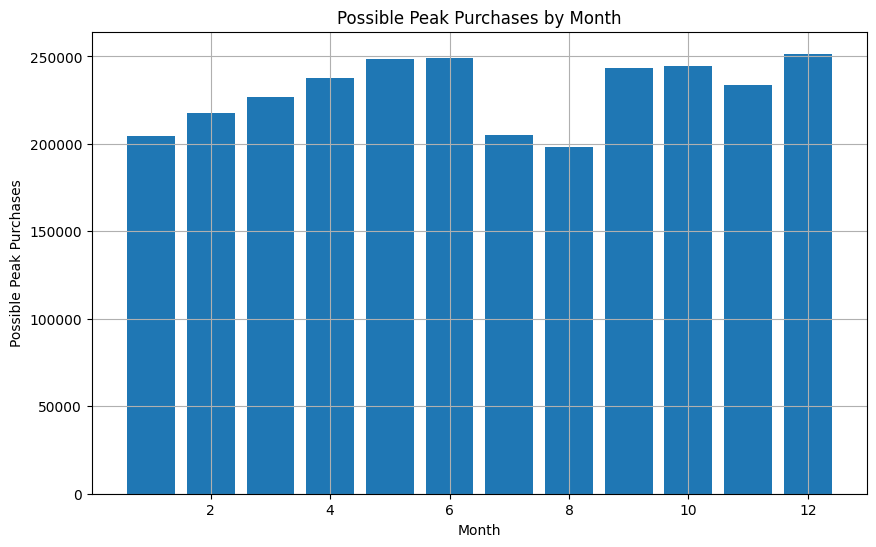

In [ ]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

month_grouped = df.groupby('Month')

average_purchases = month_grouped['total_amount_sales'].mean()

median_purchases = month_grouped['total_amount_sales'].median()

maximum_purchases = month_grouped['total_amount_sales'].max()

minimum_purchases = month_grouped['total_amount_sales'].min()

possible_peak_purchases = month_grouped['total_amount_sales'].sum()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_purchases.index, average_purchases.values)
plt.xlabel('Month')
plt.ylabel('Average Purchases')
plt.title('Average Purchases by Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(median_purchases.index, median_purchases.values)
plt.xlabel('Month')
plt.ylabel('Median Purchases')
plt.title('Median Purchases by Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(maximum_purchases.index, maximum_purchases.values)
plt.xlabel('Month')
plt.ylabel('Maximum Purchases')
plt.title('Maximum Purchases by Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(minimum_purchases.index, minimum_purchases.values)
plt.xlabel('Month')
plt.ylabel('Minimum Purchases')
plt.title('Minimum Purchases by Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(possible_peak_purchases.index, possible_peak_purchases.values)
plt.xlabel('Month')
plt.ylabel('Possible Peak Purchases')
plt.title('Possible Peak Purchases by Month')
plt.grid(True)
plt.show()


The graph visually demonstrates that June and December consistently
exhibit higher levels of possible peak purchases, aligning with our earlier identification of these
months as top-season periods of elevated consumer activity.
The analysis also underscores the potential influence of holidays and special occasions that
often coincide with the identified peak purchasing months. The heightened consumer activity
observed in June and December could be attributed to holidays such as Christmas and New
Year's, summer holidays, the end of the School Year, outdoor activities, and wedding season
which typically result in increased spending.
Furthermore, the graph highlights additional months, such as March, May, and October, which
also manifest as high points of potential peak purchases. This nuanced insight underscores
the complexity of consumer behavior and the interplay of various factors contributing to
purchasing patterns. By quantifying the possible peak purchases for each month and visually
representing this information, the graph provides a data-driven perspective that validates our
initial analysis and underscores the significance of strategic planning around these critical
periods. The graph's depiction of months with heightened purchasing activity provides an
opportunity to address the months of July, August, and January, which appear as lower
seasons

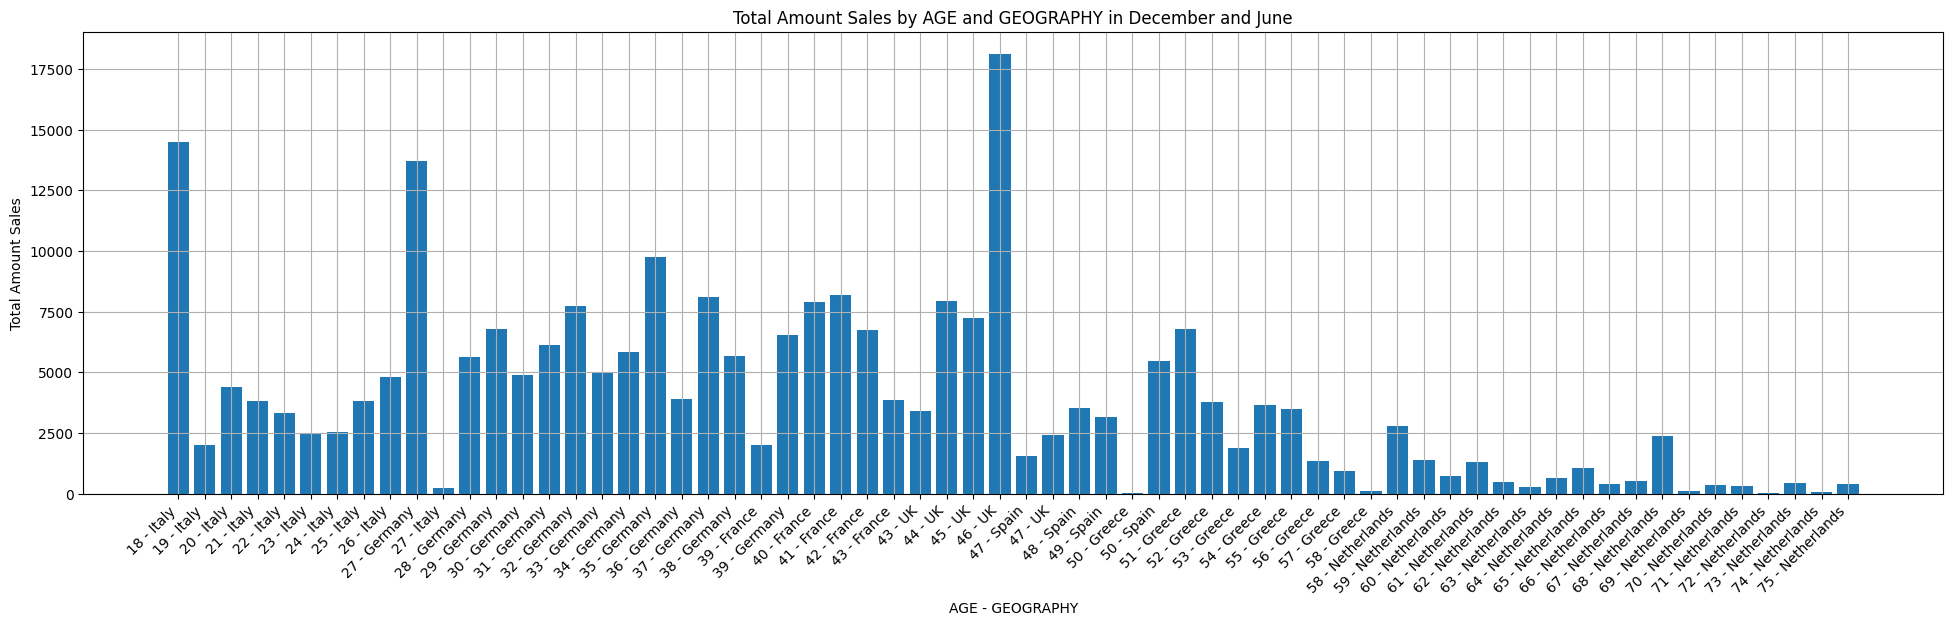

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df_dec_jun = df[(df['Date'].dt.month.isin([6]))]

total_sales_by_age_geo = df_dec_jun.groupby(['AGE', 'GEOGRAPHY'])['total_amount_sales'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))
plt.bar(total_sales_by_age_geo['AGE'].astype(str) + ' - ' + total_sales_by_age_geo['GEOGRAPHY'], total_sales_by_age_geo['total_amount_sales'])
plt.xlabel('AGE - GEOGRAPHY')
plt.ylabel('Total Amount Sales')
plt.title('Total Amount Sales by AGE and GEOGRAPHY in December and June')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


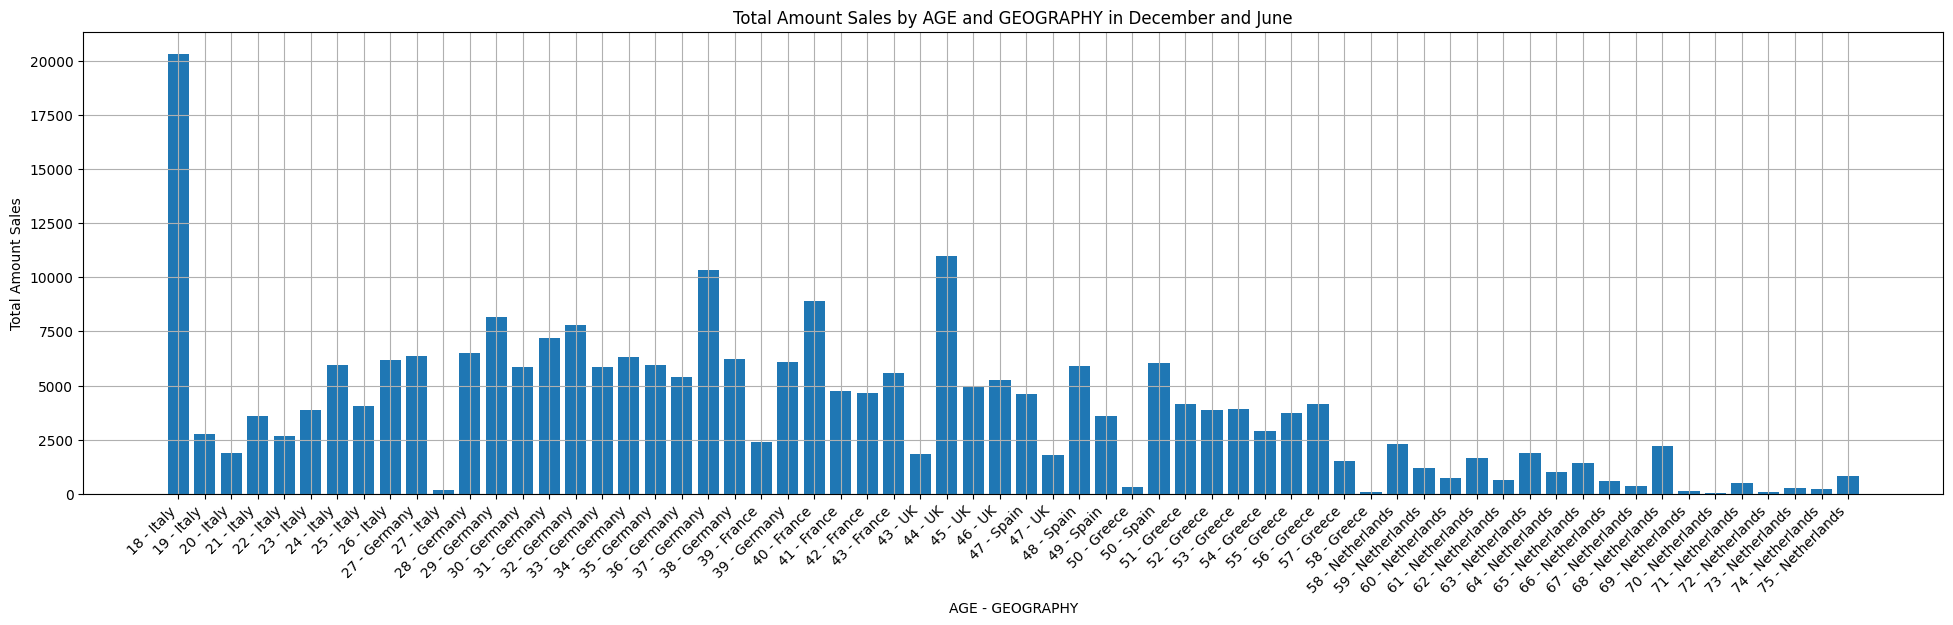

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df_dec_jun = df[(df['Date'].dt.month.isin([12]))]

total_sales_by_age_geo = df_dec_jun.groupby(['AGE', 'GEOGRAPHY'])['total_amount_sales'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))
plt.bar(total_sales_by_age_geo['AGE'].astype(str) + ' - ' + total_sales_by_age_geo['GEOGRAPHY'], total_sales_by_age_geo['total_amount_sales'])
plt.xlabel('AGE - GEOGRAPHY')
plt.ylabel('Total Amount Sales')
plt.title('Total Amount Sales by AGE and GEOGRAPHY in December and June')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

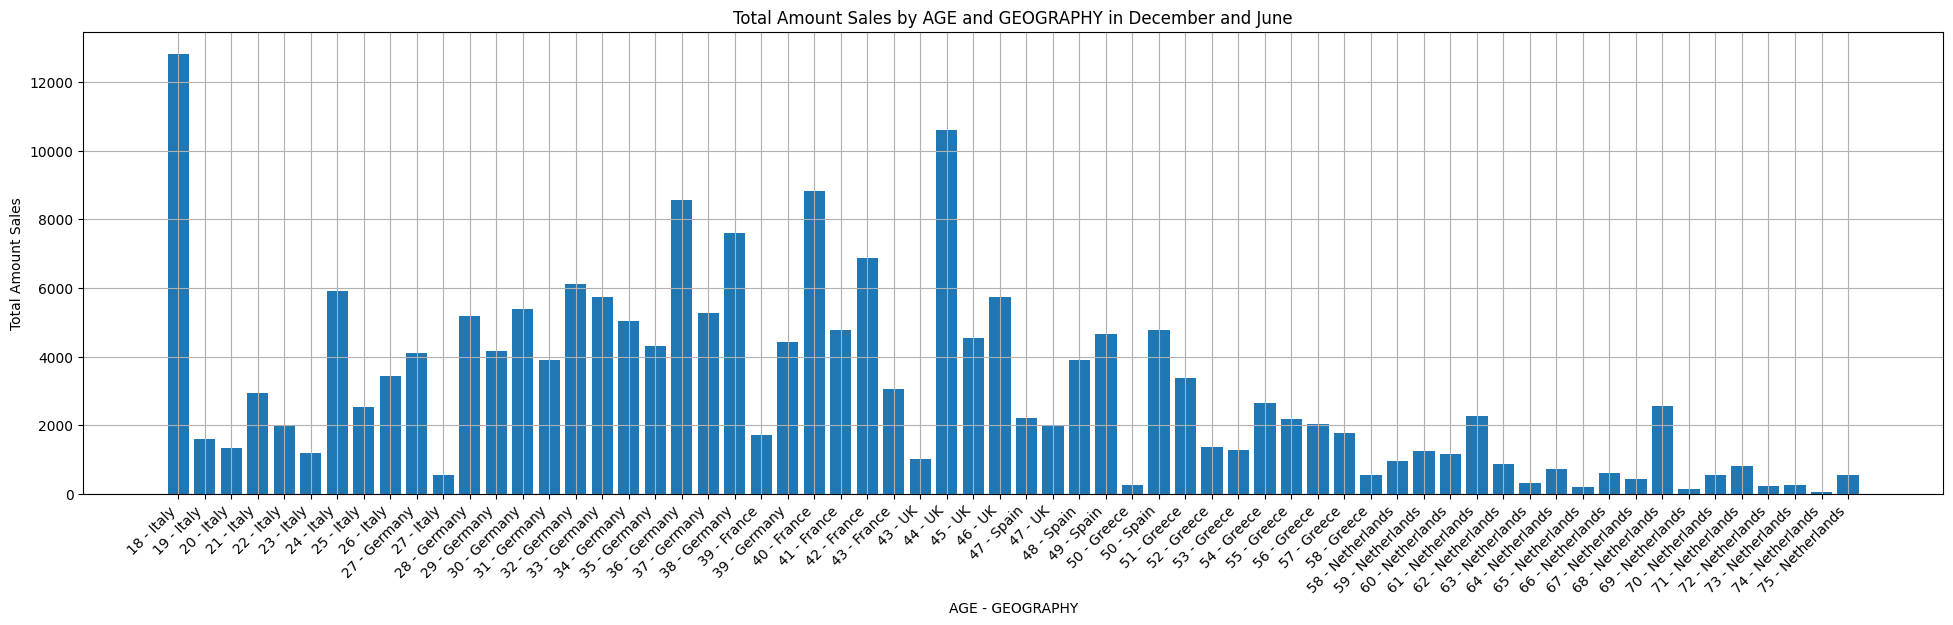

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df_dec_jun = df[(df['Date'].dt.month.isin([8]))]

total_sales_by_age_geo = df_dec_jun.groupby(['AGE', 'GEOGRAPHY'])['total_amount_sales'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))
plt.bar(total_sales_by_age_geo['AGE'].astype(str) + ' - ' + total_sales_by_age_geo['GEOGRAPHY'], total_sales_by_age_geo['total_amount_sales'])
plt.xlabel('AGE - GEOGRAPHY')
plt.ylabel('Total Amount Sales')
plt.title('Total Amount Sales by AGE and GEOGRAPHY in December and June')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()